## importing packages
---

In [4]:
import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot, cm
import pydicom as dicom
import os
import tensorflow as tf

## Load in images
---

In [5]:
Path = "./Training set stage 1/Pneumonia/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(Path):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [6]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), 5)#len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]))#, float(RefDs.SliceThickness))


In [7]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])


In [8]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM[:5]:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  

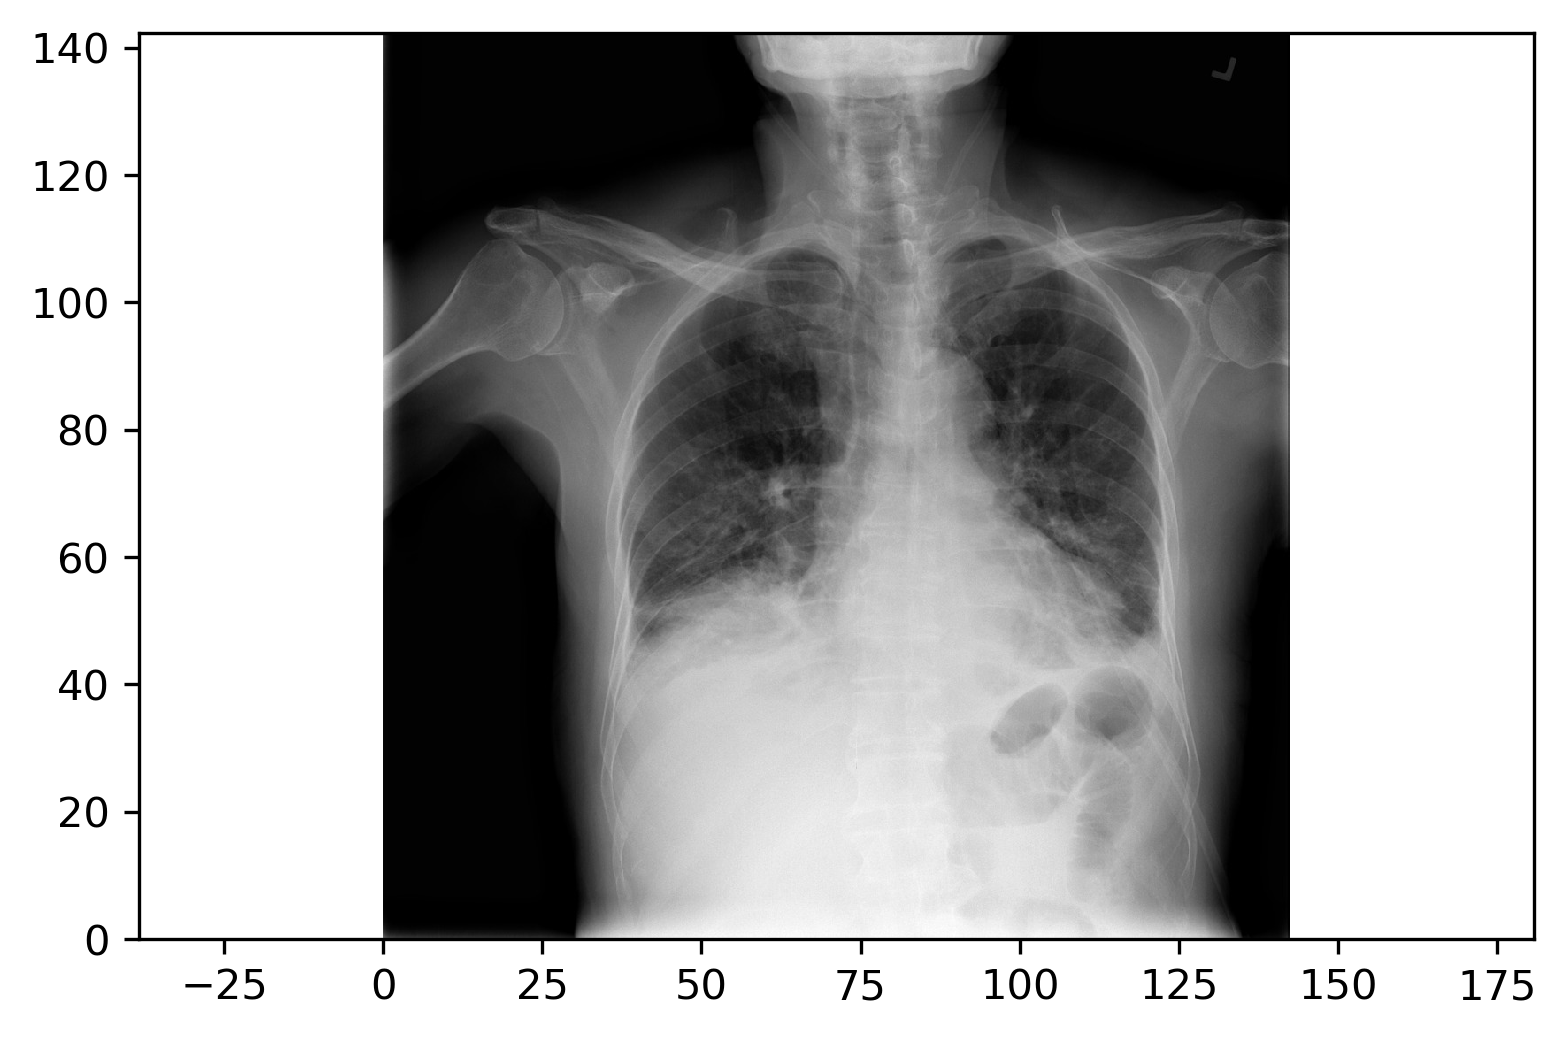

In [9]:

pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 1]))


[<tf.Tensor 'strided_slice_13:0' shape=(256, 256) dtype=float32>]


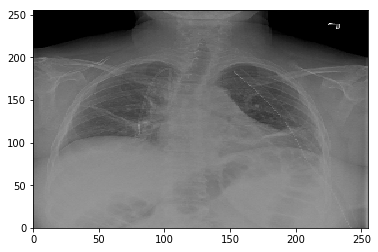

In [46]:

size_hight = 256
size_width = 256

rgb_rezise = tf.image.resize_images(
    np.flipud(np.reshape(ArrayDicom[:, :, 1],[1024,1024,1])),
    [size_hight, size_width],
    align_corners=False,
    preserve_aspect_ratio=False
)
print([rgb_rezise[:,:,0]])
pyplot.pcolormesh(np.arange(0, size_hight), np.arange(0, size_width), tf.Session().run(rgb_rezise[:,:,0]))